In [18]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '//scratch-local/jones/OPENABC2_DATASET/lp1/test_data_set1.csv'

# Read the CSV file using pandas
data_frame = pd.read_csv(csv_file_path)

# Sort the DataFrame by the specified column in ascending order
sorted_data_frame = data_frame.sort_values(by='fileName', ascending=True)

# Display the contents of the CSV file
print("Contents of the CSV file:")
print(sorted_data_frame)

# # Get the size of the CSV file in bytes
# file_size = data_frame.memory_usage(deep=True).sum()
# print("Size of the CSV file: {} bytes".format(file_size))

# Get the number of rows and columns in the CSV file
num_rows = len(data_frame)
num_columns = len(data_frame.columns)
print("Number of rows in the CSV file: {}".format(num_rows))
print("Number of columns in the CSV file: {}".format(num_columns))



Contents of the CSV file:
                             fileName
2700   ac97_ctrl_syn1000_step0.pt.zip
8390   ac97_ctrl_syn1001_step0.pt.zip
12416  ac97_ctrl_syn1002_step0.pt.zip
2807   ac97_ctrl_syn1003_step0.pt.zip
8746   ac97_ctrl_syn1004_step0.pt.zip
...                               ...
1172      wb_dma_syn1495_step0.pt.zip
2134      wb_dma_syn1496_step0.pt.zip
3489      wb_dma_syn1497_step0.pt.zip
5500      wb_dma_syn1498_step0.pt.zip
2294      wb_dma_syn1499_step0.pt.zip

[13500 rows x 1 columns]
Number of rows in the CSV file: 13500
Number of columns in the CSV file: 1


In [19]:
import pandas as pd

# Specify the path to your file
csv_file_path = '//scratch-local/jones/OPENABC2_DATASET/lp1/test_data_set1.csv'
csv_file_path2 = '//scratch-local/jones/OPENABC2_DATASET/lp1/train_data_set1.csv'

data_frame = pd.read_csv(csv_file_path)
data_frame2 = pd.read_csv(csv_file_path2)

# Extract the file extensions
data_frame['Extension'] = data_frame['fileName'].str.extract(r'\.(\w+)$')
data_frame2['Extension'] = data_frame2['fileName'].str.extract(r'\.(\w+)$')

# Count the number of rows with .zip extension
zip_rows = len(data_frame[data_frame['Extension'] == 'zip'])
zip_rows2 = len(data_frame2[data_frame2['Extension'] == 'zip'])

# Count the number of rows with .pt extension
pt_rows = len(data_frame[data_frame['Extension'] == 'pt'])
pt_rows2= len(data_frame2[data_frame2['Extension'] == 'pt'])

# Print the results
print("Number of .zip rows of test:", zip_rows)
print("Number of .zip rows of train:", zip_rows2)
#print("Number of .pt rows:", pt_rows)

Number of .zip rows of test: 13500
Number of .zip rows of train: 27000


# Finding 'vga' type files

In [20]:
import os


# Specify the path to the folder
folder_path = '//scratch-local/jones/OPENABC2_DATASET/lp1/processed/'

# Get the list of items in the folder
folder_items = os.listdir(folder_path)

# Count the number of items
num_items = len(folder_items)

# Print the total number of items in the folder
print(f"Total number of items in the folder: {num_items}\n")
    
# Set the target file type
target_file_type = "bp"

# Count the number of files with 'bp' in the filename
num_bp_files = sum('bp' in filename for filename in folder_items)
print(num_bp_files)
# Initialize the count
count = 0
limit =1

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    
    if target_file_type in file_name:
        print(file_name)
        count += 1
        
    if count == limit:
        break


Total number of items in the folder: 63010

1500
bp_be_syn1395_step0.pt.zip


---

In [13]:
import torch
pt1 = torch.load('//scratch-local/jones/OPENABC2_DATASET/lp1/processed/vga_lcd_syn1025_step0.pt')
type(pt1)

torch_geometric.data.data.Data

---
---
# <span style='color:Black'>    **Plotting the input i.e Visualization using Networkx** </span>

In [54]:
import os
import zipfile
import networkx as nx

# Specify the path to your folder
folder_path = '//scratch-local/jones/OPENABC2_DATASET/lp1/processed/'

# Set the maximum number of files to unpack
max_files = 10

# Initialize a counter for the extracted files
file_count = 0

# Create an empty graph
graph = nx.Graph()

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.zip'):
        zip_file_path = os.path.join(folder_path, file_name)

        # Extract the contents of the zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
            # Process the contents of the zip file and perform desired operations
            printed_files = 0
            # Example: Print the names of the files within the zip
            for zip_member in zip_file.namelist():
                print(zip_member)
            
            file_count += 1
        
        # Break the loop if the maximum number of files is reached
        if file_count >= max_files:
            break


Rocket_full_syn507_step0.pt
tinyRocket_syn606_step0.pt
s35932_syn508_step0.pt
jpeg_syn86_step0.pt
Rocket_muldiv_syn1456_step0.pt
ss_pcm_syn469_step0.pt
vga_lcd_syn1025_step0.pt
des3_area_syn53_step0.pt
or1200_fpu_syn711_step0.pt
s38584_syn175_step0.pt


---
# find content of the file
---

In [21]:
import torch

# Specify the path to the file
file_path = '/scratch-local/jones/OPENABC2_DATASET/lp1/processed/tinyRocket_syn606_step0.pt'
file_path2= '/'
# Load the contents of the file
contents = torch.load(file_path)

# Print the contents
print(type(contents))
print(contents)
print(f'\nNumber of nodes: {contents.and_nodes}')
#print(f'Longest Path: {contents.longest_path}')
#print(f'is undirected: {contents.is_undirected()}')

<class 'torch_geometric.data.data.Data'>
Data(and_nodes=52315, desName=[1], edge_index=[2, 108811], edge_type=[108811], longest_path=80, node_id=[61057], node_type=[61057], not_edges=67410, num_inverted_predecessors=[61057], pi=4561, po=4181, stepID=[1], synID=[1], synVec=[20])

Number of nodes: 52315


# read the results

In [2]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '//scratch-local/jones/OpenABC/runs/topKaccuracy_test.csv'

# Read the CSV file using pandas
data_frame = pd.read_csv(csv_file_path)

# Sort the DataFrame by the specified column in ascending order
#sorted_data_frame = data_frame.sort_values(by='fileName', ascending=True)

# Display the contents of the CSV file
print("Contents of the CSV file:")
print(data_frame)



# Get the number of rows and columns in the CSV file
num_rows = len(data_frame)
#num_columns = len(data_frame.columns)
print("Number of rows in the CSV file: {}".format(num_rows))
#print("Number of columns in the CSV file: {}".format(num_columns))

Contents of the CSV file:
          design  top1  top5  top10     top15  top20  top25
0            iir   0.0  0.16   0.30  0.306667   0.37  0.432
1        vga_lcd   0.2  0.08   0.16  0.213333   0.36  0.416
2            fir   0.0  0.24   0.26  0.266667   0.35  0.432
3            i2c   0.0  0.04   0.18  0.320000   0.43  0.496
4        picosoc   0.0  0.00   0.26  0.360000   0.46  0.552
5            pci   0.0  0.24   0.34  0.480000   0.48  0.544
6      des3_area   0.0  0.16   0.30  0.386667   0.48  0.552
7            fpu   0.2  0.36   0.38  0.426667   0.51  0.576
8          bp_be   0.2  0.52   0.64  0.706667   0.77  0.768
9      wb_conmax   0.0  0.04   0.12  0.320000   0.46  0.536
10           aes   0.0  0.40   0.50  0.546667   0.61  0.680
11    simple_spi   0.0  0.08   0.26  0.333333   0.43  0.496
12          sasc   0.2  0.04   0.22  0.320000   0.37  0.424
13        wb_dma   0.0  0.28   0.28  0.413333   0.42  0.504
14      mem_ctrl   0.2  0.12   0.26  0.333333   0.41  0.480
15        sha2

In [1]:
import pandas as pd

# Specify the path to your CSV file
actualvalues = '//scratch-local/jones/OpenABC/runs/desDF1_test_des3_area.csv'
predval = '//scratch-local/jones/OpenABC/runs/desDF2_test_des3_area.csv' #sorting it by prediction

# Read the CSV file using pandas
act1 = pd.read_csv(actualvalues)
pred1=pd.read_csv(predval)

# Sort the DataFrame by the specified column in ascending order
#sorted_data_frame = data_frame.sort_values(by='fileName', ascending=True)

# Display the contents of the CSV file
print("Contents of the CSV file:")
print(act1)

print("predicted")
print(pred1)


Contents of the CSV file:
       designs  synID  prediction    actual
0    des3_area   1276   -0.737913 -3.188051
1    des3_area   1038   -0.802376 -2.708917
2    des3_area   1367   -0.552023 -2.229783
3    des3_area   1328   -0.098782 -2.070072
4    des3_area   1154   -0.649415 -2.070072
..         ...    ...         ...       ...
495  des3_area   1107    1.193354  2.561557
496  des3_area   1063    0.909483  3.040691
497  des3_area   1495    1.740967  3.200402
498  des3_area   1052    1.814630  3.200402
499  des3_area   1092    1.776250  3.200402

[500 rows x 4 columns]
predicted
       designs  synID  prediction    actual
0    des3_area   1258   -1.319629 -0.632670
1    des3_area   1313   -1.274773 -0.632670
2    des3_area   1047   -1.246045 -0.792381
3    des3_area   1060   -1.180981 -1.111804
4    des3_area   1057   -1.150313 -1.111804
..         ...    ...         ...       ...
495  des3_area   1299    1.477156  2.082423
496  des3_area   1364    1.539202  1.124155
497  des3_area  

In [ ]:
val accuracy

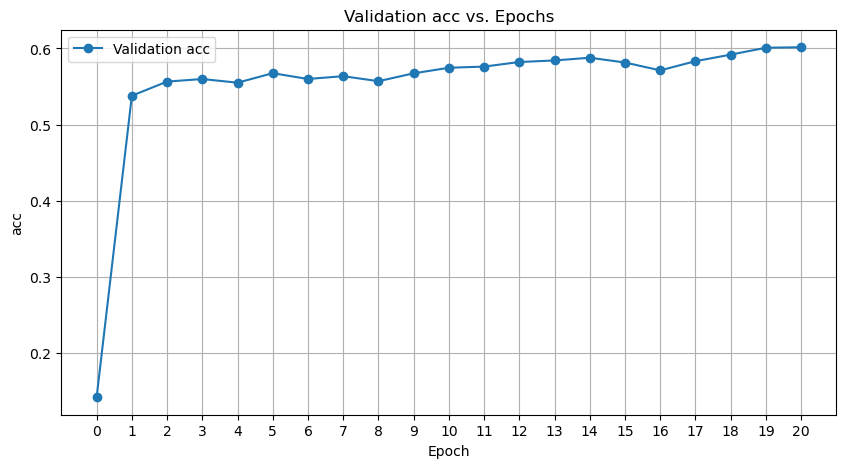

<Figure size 640x480 with 0 Axes>

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import tikzplotlib

# Your data
values = [0.14216683969256852, 0.5378675069412276, 0.5564719845701008, 0.559786666100286, 0.5549863959034047, 0.5674454223220771, 0.559857959645415, 0.5635318123807873, 0.5569684498310609, 0.5672688779574473, 0.5745994937006428, 0.5761144794155498, 0.5821362994941112, 0.584178753083581, 0.5877621816270227, 0.5814643513183603, 0.5711631395490337, 0.5832413968211653, 0.5918291530151343, 0.6008774462567288, 0.6015413555453342]

# Plotting
#plt.plot(range(0, 21), values, marker='o')

# Plot the validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(0, 21), values, marker='o', label='Validation acc')
plt.xticks(range(0, 21, 1))

plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Validation acc vs. Epochs')


plt.grid(True)
plt.legend()
plt.show()

# Save the plot as a .tex file
tikzplotlib.save('values_plot.tex')


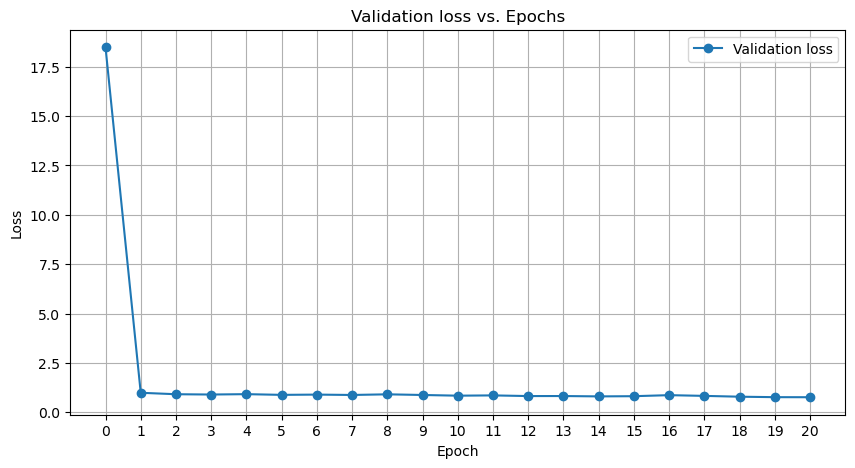

<Figure size 640x480 with 0 Axes>

In [10]:
#val loss
%matplotlib inline
import matplotlib.pyplot as plt
import tikzplotlib

# Your data
values_valloss = [18.487557973111116, 0.9909181476853512, 0.9171055336793263, 0.9017770489719179, 0.9207671606540679, 0.8846783424086041, 0.898206135807214, 0.8793942926989662, 0.9123772684070799, 0.8787577581957534, 0.8437685733812826, 0.8579460393057929, 0.8240902676626488, 0.8255106578877679, 0.8074102427782835, 0.8175696200353127, 0.8700701380659033, 0.8331488729406287, 0.7918910870728669, 0.7683126172092226, 0.7654494655132293]

# Plotting
#plt.plot(range(0, 21), values, marker='o')

# Plot the validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(0, 21), values_valloss, marker='o', label='Validation loss')
plt.xticks(range(0, 21, 1))

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation loss vs. Epochs')


plt.grid(True)
plt.legend()
plt.show()

# Save the plot as a .tex file
tikzplotlib.save('valuesvalloss_plot.tex')

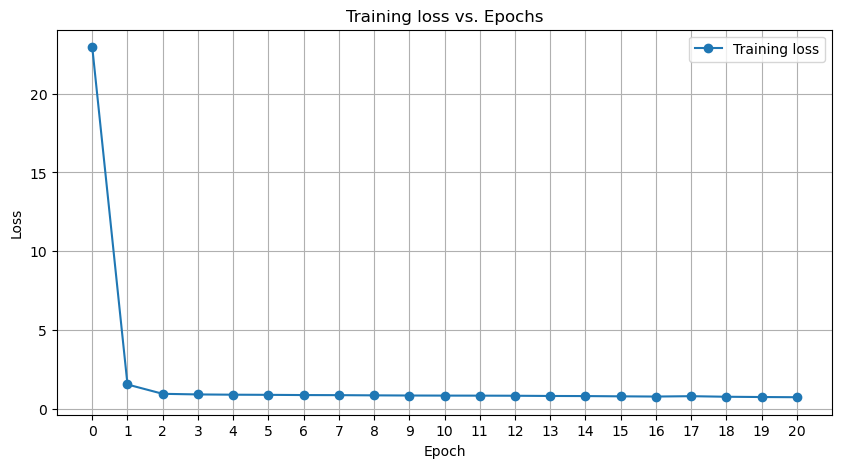

<Figure size 640x480 with 0 Axes>

In [11]:
#trainnf loss
%matplotlib inline
import matplotlib.pyplot as plt
import tikzplotlib

# Your data
train_loss = [22.956580626147765, 1.5309720464878611, 0.9387662575725052, 0.8996459987869969, 0.8826862899269219, 0.8733724734104342, 0.8594574050743271, 0.8538101038750675, 0.841002127751708, 0.8306597386797269, 0.8254103514772875, 0.8221509224838681, 0.8162727301843741, 0.8016896704129047, 0.7953928905035611, 0.7786177866961117, 0.7653595804119552, 0.7880988998021241, 0.7521076491668268, 0.734149106449827, 0.7222175816115406]

# Plotting
#plt.plot(range(0, 21), values, marker='o')

# Plot the train loss
plt.figure(figsize=(10, 5))
plt.plot(range(0, 21), train_loss, marker='o', label='Training loss')
plt.xticks(range(0, 21, 1))

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss vs. Epochs')


plt.grid(True)
plt.legend()
plt.show()

# Save the plot as a .tex file
tikzplotlib.save('trainloss_plot.tex')